<a href="https://colab.research.google.com/github/riskydav/Orbit-Future-Academy/blob/main/34_MFCC_STT_TTS_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kamis, 28 Okt 2021 : NLP (Speech Recognition, Speech to Text/STT & Text to Speech/TTS) 

Link all audio dapat di download disini https://github.com/Wayan123/data-rekaman

REFERENSI

1. [Web practicalcryptography.com tentang MFCC](http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/)
2. https://pypi.org/project/PyAudio/
3. https://speechresearch.github.io/fastspeech2/
4. https://github.com/rasyidev/simple-stt-tts  

Info lebih lengkap mengenai masing-masing fungsi pada MFCC dapat dibaca di documentation berikut:
1. https://python-speech-features.readthedocs.io/en/latest/
2. https://github.com/jameslyons/python_speech_features (github)
3. http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/ (tutorial)

Link Referensi MFCC Tanpa Fungsi Delta & Double Delta: 
1. https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d
2. https://python-speech-features.readthedocs.io/en/latest/
3. https://www.programcreek.com/python/example/105369/python_speech_features.delta
4. https://github.com/jameslyons/python_speech_features/blob/master/docs/source/index.rst
5. https://github.com/jameslyons/python_speech_features

# MFCC With Delta untuk 26 feature, dengan 13 dari MFCC dan 13 dari Delta, fitur dapat di update hingga 40 dengan 20 MFCC dan 20 Delta, jadi dapat meningkatkan akurasi, hanya saja komputasi juga akan lebih berat dan lama.

- MFCC (Mel Frequency Cepstral Coefficients) merupakan salah satu metode yang banyak digunakan dalam bidang speech technology, baik speaker recognition maupun speech recognition. Metode ini digunakan untuk melakukan feature extraction, sebuah proses yang mengkonversikan sinyal suara menjadi beberapa parameter.
- Bagian MFCC adalah membandingkan antara pakai teknik MFCC saja dan dengan penambahan fungsi Delta-Delta

## Install library MFCC

In [1]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=33602b1984e9604abe35c62dd12aee3309c43317cbb3e352f6fb757bd52388d7
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


## Import Library yang dibutuhkan

In [2]:
from python_speech_features import mfcc   # Import library MFCC
from python_speech_features import delta  # Memanggil fungsi delta 
from python_speech_features import logfbank # menggail fungsi log filter bank
import scipy.io.wavfile as wav # library untuk menanangi file dengan format .wav

## Load file wav dari lokal komputer

Buka files lalu pilih klik kanan pada folder content pilih upload

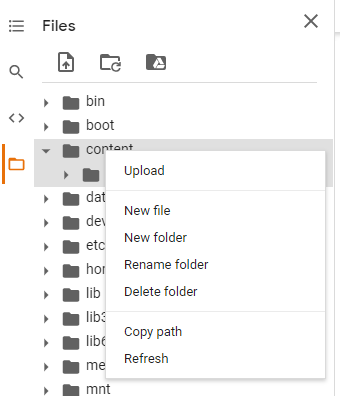

In [5]:
path_file = "/content/mixkit-robot-speaking-1420.wav"

## Memutar audio yang di upload dengan menggunakan library Ipython 

In [6]:
import IPython.display as ipd
ipd.Audio(path_file)

## Melakukan tahap preprocessing pada audio menggunakan MFCC

In [ ]:
(rate,sig) = wav.read(path_file)
mfcc_feat = mfcc(sig,rate)
d_mfcc_feat = delta(mfcc_feat, 2)
fbank_feat = logfbank(sig,rate)

## Menampilkan hasil ekstraksi ciri menggunakan MFCC + Fungsi Delta dengan masing2 13 feature, jadi total 26 feature.

In [ ]:
print(fbank_feat[1:3,:])

[[ 5.40952327  5.27503219  4.61333235  4.46917528  5.08064042  5.54209255
   6.96869708  6.52222032  6.3474741   6.45383921  6.78291667  7.65121519
   7.79514893  7.90644753  8.17890722  8.14861938  8.66860063  9.05679499
   9.59584769  9.82626979  9.65613824  9.31135215 10.1501742  10.06158924
   9.82894678  8.70877909]
 [ 4.73190247  4.21947252  4.01578997  6.38507855  5.76995235  5.25681018
   6.46441852  6.50544449  5.00246869  6.00249104  6.58012247  7.54585581
   7.38493879  7.39516933  7.9271287   8.33663864  9.20267154  9.22956928
   9.5512093   9.9379602   9.97827575  9.56729665 10.33923171 10.29897038
  10.02765118  9.07267703]]


In [ ]:
fbank_feat

array([[ 5.05837454,  4.69945829,  5.01019657, ..., 10.06784406,
         9.72281492,  9.00306898],
       [ 5.40952327,  5.27503219,  4.61333235, ..., 10.06158924,
         9.82894678,  8.70877909],
       [ 4.73190247,  4.21947252,  4.01578997, ..., 10.29897038,
        10.02765118,  9.07267703],
       ...,
       [ 3.1948645 ,  4.9930906 ,  3.30831947, ..., 10.47552141,
         9.93594575,  9.13274544],
       [ 3.10406004,  4.37634903,  5.70884036, ..., 10.45365173,
        10.08580607,  9.18109233],
       [ 4.75630047,  5.7601739 ,  4.48774333, ..., 10.23654937,
         9.95028475,  8.74067339]])

Tampilkan total baris feature 

In [ ]:
data = len(fbank_feat)
data

295

Menyimpan file hasil ekstraksi ke format csv menggunakan library pandas

In [ ]:
import pandas as pd 
   
df = pd.DataFrame(fbank_feat)
# saving the dataframe
df.to_csv('extract_delta_halo.csv')

In [ ]:
# Kita juga dapat menampilkan format yang telah disimpan disini

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,5.058375,4.699458,5.010197,5.992782,4.898797,5.920567,6.133607,5.423469,5.640070,6.195339,5.767893,6.793049,7.617333,7.708420,8.185367,8.593932,9.238493,8.618699,9.260594,9.515631,9.431563,9.213193,10.296237,10.067844,9.722815,9.003069
1,5.409523,5.275032,4.613332,4.469175,5.080640,5.542093,6.968697,6.522220,6.347474,6.453839,6.782917,7.651215,7.795149,7.906448,8.178907,8.148619,8.668601,9.056795,9.595848,9.826270,9.656138,9.311352,10.150174,10.061589,9.828947,8.708779
2,4.731902,4.219473,4.015790,6.385079,5.769952,5.256810,6.464419,6.505444,5.002469,6.002491,6.580122,7.545856,7.384939,7.395169,7.927129,8.336639,9.202672,9.229569,9.551209,9.937960,9.978276,9.567297,10.339232,10.298970,10.027651,9.072677
3,4.063131,4.778576,4.202984,5.361942,6.215727,6.389502,6.890122,6.863103,6.706865,6.411253,6.648342,7.494193,7.914460,8.068319,8.261159,8.114787,8.596453,8.908127,9.745715,9.930851,9.708902,9.184525,10.018841,10.290953,9.735346,8.819003
4,5.938922,3.507940,4.491080,4.741340,5.854195,6.847948,6.572518,6.034017,5.584480,6.013451,5.893924,7.888419,7.711956,8.108852,8.411253,8.968694,9.465658,8.807762,10.104384,10.286369,9.659482,9.516384,10.241640,10.304194,9.714260,8.901108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,6.511353,4.912915,5.298153,6.484740,6.294715,6.326256,6.436397,5.895657,6.069039,5.990548,6.608107,6.599338,7.458857,8.031246,8.134069,8.756070,8.795727,9.490451,9.763177,9.953131,9.884970,9.111148,9.889506,10.073816,9.818110,8.534528
291,1.943519,4.933836,4.639058,6.697561,6.803318,6.971697,7.266438,6.673208,6.361309,7.554131,7.040235,8.671359,9.674179,10.870220,11.284608,10.434349,11.074358,12.857489,12.625526,10.593794,10.337841,9.637994,10.519834,12.042386,11.141536,9.639350
292,3.194864,4.993091,3.308319,6.532255,7.100302,7.296372,6.074886,7.261062,6.302201,6.423688,6.624799,7.605270,7.973405,9.693109,10.200776,8.848091,9.580522,10.682289,10.240466,9.863538,9.852628,9.595721,10.435929,10.475521,9.935946,9.132745
293,3.104060,4.376349,5.708840,6.271228,7.082293,6.462383,6.668962,5.406098,6.231374,6.487364,6.283306,7.763284,7.390525,8.332778,8.205529,8.501606,8.871996,9.332873,9.717141,10.094600,9.942559,9.600524,10.509622,10.453652,10.085806,9.181092


# MFCC Pembahasan Lengkap Tanpa Fungsi Delta dan Double Delta

Download [Hai.wav](https://codeload.github.com/rasyidev/word_vector/rekam/master)

In [ ]:
import librosa
audio_path = 'Hai.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
librosa.load(audio_path, sr=44100)

(array([ 0.00698853,  0.00706482,  0.00738525, ..., -0.00465393,
        -0.00379944, -0.00419617], dtype=float32), 44100)

In [ ]:
librosa.load(audio_path, sr=None)

(array([ 0.00698853,  0.00706482,  0.00738525, ..., -0.00465393,
        -0.00379944, -0.00419617], dtype=float32), 44100)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

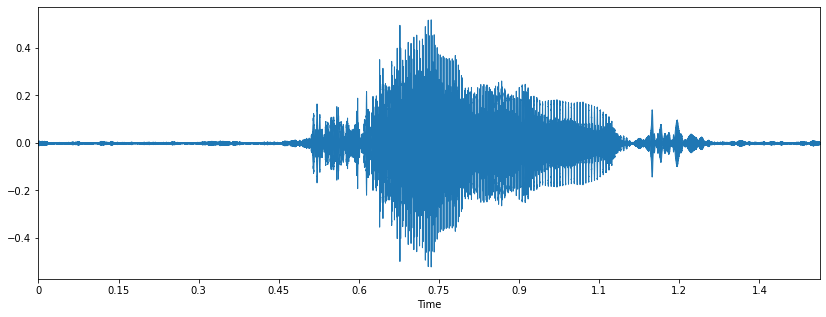

In [ ]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

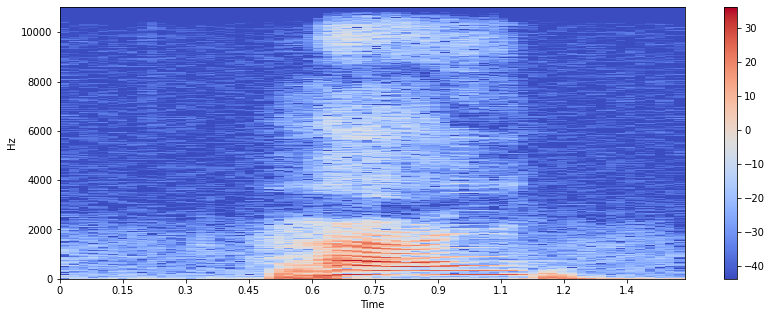

In [ ]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

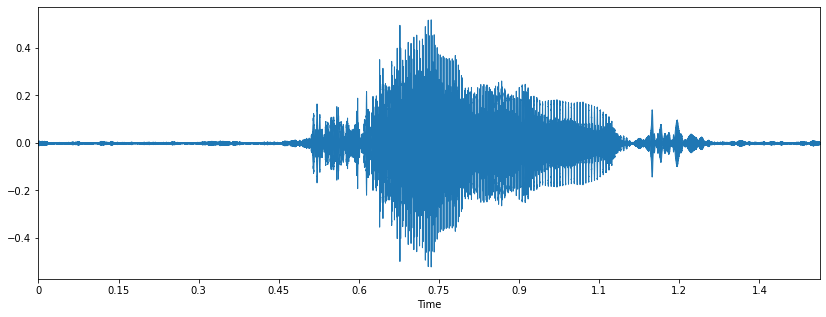

In [ ]:
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

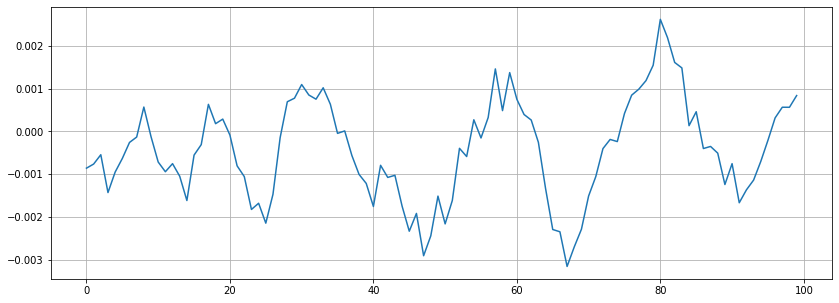

In [ ]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

15


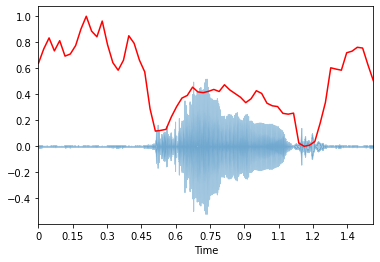

In [ ]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

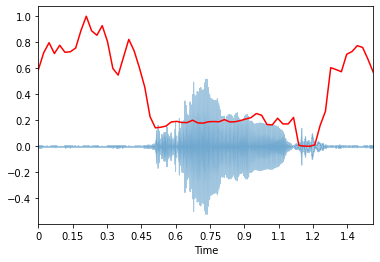

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 64)


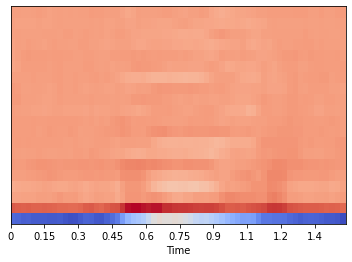

In [ ]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
mfccs

array([[-4.4510648e+02, -4.5185443e+02, -4.6281317e+02, ...,
        -4.6891092e+02, -4.7474683e+02, -4.9178784e+02],
       [ 1.0386191e+02,  9.9703995e+01,  9.5867180e+01, ...,
         9.5756561e+01,  9.3646866e+01,  8.5645248e+01],
       [-3.8748236e+00, -2.2216504e+00, -4.1172001e-01, ...,
        -9.9394135e-02,  3.8659410e+00,  1.0304558e+01],
       ...,
       [ 1.1296713e+00,  4.7724900e+00,  1.1752350e+00, ...,
         1.8061011e+00,  8.8301086e-01,  3.8253975e+00],
       [ 6.9019032e-01,  3.8423574e-01, -7.4730295e-01, ...,
         9.0605599e-01,  3.3933167e+00,  5.0554714e+00],
       [ 4.1949344e+00,  3.2024260e+00,  1.9986278e+00, ...,
         5.4974928e+00,  1.0448075e+01,  9.9095459e+00]], dtype=float32)

In [ ]:
import pandas as pd 
   
df1 = pd.DataFrame(mfccs)
# saving the dataframe
df.to_csv('extract_delta_hai.csv')

In [ ]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,-445.106476,-451.854431,-462.813171,-459.722778,-466.800964,-467.940277,-466.890717,-470.454834,-468.940399,-466.085297,-477.755035,-484.068695,-483.041626,-469.965424,-456.331421,-459.911194,-473.212860,-475.801147,-455.612183,-440.831665,-417.948486,-362.348297,-308.115509,-282.573059,-270.339325,-251.003403,-205.900375,-154.716293,-131.940002,-145.912766,-146.456314,-138.106613,-145.816910,-163.939972,-184.843338,-213.177567,-226.679764,-220.881653,-239.256363,-258.091370,-279.602051,-303.076172,-321.339630,-337.613525,-354.851776,-351.936096,-355.769012,-392.498505,-424.725128,-424.461029,-429.827698,-430.390381,-432.480560,-445.429108,-452.425934,-463.005981,-457.374603,-454.041992,-455.408905,-462.094452,-469.658600,-468.910919,-474.746826,-491.787842
1,103.861908,99.703995,95.867180,99.781982,94.681091,94.953377,95.290810,94.371017,89.991776,85.573669,85.648453,83.402298,83.840012,89.839157,101.000298,103.181625,93.578308,89.656113,101.505173,112.932327,114.169693,145.356689,175.890015,182.102844,179.962952,172.144989,168.530060,172.234161,172.109100,155.483765,153.792984,147.562012,142.796204,142.701416,141.191559,137.021484,132.927032,136.803406,134.984985,131.156082,116.433990,102.179543,101.505051,104.840424,102.798088,108.451965,115.974464,120.685120,124.585037,144.957062,147.449585,143.334961,135.038147,114.179558,110.987831,105.400803,101.965393,101.798874,102.356339,97.968201,94.156380,95.756561,93.646866,85.645248
2,-3.874824,-2.221650,-0.411720,-1.329070,-0.530385,4.932017,4.775945,1.999816,6.916057,13.744986,5.892050,6.283750,10.222467,-0.106987,-8.263479,-3.987852,4.522972,1.730621,0.062537,-1.811102,-16.090771,0.354782,20.368351,21.163277,19.968355,13.582872,21.214125,26.735662,21.304510,9.114779,0.452020,-13.750317,-17.224798,-5.175433,-5.387882,4.530859,5.169559,1.015990,7.257888,9.596769,26.997410,40.378387,40.030830,34.821182,34.084507,33.053650,33.485317,28.621424,27.902870,49.066761,53.310600,44.387283,29.832539,8.257497,6.453222,3.643116,-1.586390,-1.621199,0.714742,2.254972,4.029512,-0.099394,3.865941,10.304558
3,-18.523785,-12.820850,-10.262888,-10.113256,-8.900057,-5.091537,-1.817684,-3.121804,-9.234905,-12.401880,-10.634393,-7.338233,-2.814152,-9.258865,-15.913258,-9.667343,-3.915233,-6.778760,-5.941370,-11.791668,-21.745541,0.897845,17.131187,16.601749,17.123184,7.152564,-12.181421,-37.414188,-49.822037,-61.513981,-69.343277,-69.807281,-65.365585,-63.437832,-68.634483,-71.353386,-62.452221,-57.693443,-46.029640,-28.513550,-9.396919,1.387013,-0.673339,2.997140,6.445941,13.277933,23.228708,22.333252,22.818760,38.609035,36.440178,29.661598,20.055119,-1.038728,-6.668884,-10.236225,-12.285004,-11.063530,-8.310064,-6.869131,-6.725512,-14.726271,-10.657545,-0.430509
4,5.559778,4.870842,5.453701,6.008595,9.510374,11.442991,15.493285,19.971806,16.339943,12.957361,10.225728,10.923638,9.481153,12.048321,15.613191,14.858370,12.657562,14.273296,12.847383,11.527987,9.889072,28.034496,31.985497,30.750343,31.152679,22.582867,5.666174,-9.746162,-14.967382,-21.033237,-24.045424,-28.631306,-28.130003,-27.098652,-22.453190,-19.932552,-17.095564,-9.219383,-2.930507,2.200942,-3.555583,-3.893373,5.741500,15.232733,20.705633,24.290928,16.802937,10.652271,23.668703,41.038002,41.915745,40.375343,37.502968,20.251862,14.158273,15.168491,13.473019,12.374374,13.382221,14.035023,14.273886,9.501762,4.370739,5.269461
5,11.563115,10.507207,10.203854,15.053675,17.763680,22.337694,21.981323,19.258991,18.801308,15.293660,16.612959,17.942360,17.346582,21.498539,19.888321,17.238110,21.479324,22.314098,17.912468,17.458210,24.314857,39.467022,44.567684,44.702404,45.551895,42.798286,37.952789,40.454315,36.532585,31.346766,28.932766,23.621208,22.603710,27.549515,28.818928,26.207956,26.473515,26.216541,18.383469,4.747552,-2.898398,-4.705056,-1.615296,5.3232

# Speech to Text (STT)



## Install Library SpeechRecognition

In [ ]:
!pip install speechrecognition

     |████████████████████████████████| 32.8 MB 38 kB/s 


## Import modul google speech recognition, library ini hanya bisa bekerja secara online tidak untuk offline.

In [ ]:
import speech_recognition as sr

## Load wav file dari lokal

In [ ]:
path1 = "Rekam1.wav"

## Tes memutar file wav

In [ ]:
import IPython.display as ipd
ipd.Audio(path1)

## Inisialisasi recognizer

In [ ]:
# initialize the recognizer
r = sr.Recognizer()

In [ ]:
# open the file
# Membuka file audio yang di upload
with sr.AudioFile(path1) as source:
    # listen for the data (load audio to memory)
    # Load audio ke memori
    audio_data = r.record(source)
    # recognize (convert from speech to text)
    # konversi audio ke teks dan menggunakan bahasa Indonesia (id), bahasa dapat diganti sesuai dengan kebutuhan
    text = r.recognize_google(audio_data, language='id')
    # Tampilkan isi teks
    print(text) 

tes 123


# Text to Speech (TTS) menggunakan Google TTS

## Install library Google Text to Speech

In [ ]:
!pip install gTTS

## Import modul gTTS

In [ ]:
from gtts import gTTS

## Masukkan kata-kata yang ingin di konversi disini, dan ubah bahasa sesuai dengan kebutuhan, msialnya teks bahasa Indonesia maka set bahasa ke 'id'

In [ ]:
# Masukkan kata-kata yang ingin di konversi disini, dan ubah bahasa sesuai dengan kebutuhan, msialnya teks bahasa Indonesia maka set bahasa ke 'id'
tts = gTTS('Halo semua apa kabar hari ini?', lang='id')

# Simpan hasil konversi ke format wav file atau bisa juga format mp3
tts.save('rekaman_tts.wav')

In [ ]:
import IPython.display as ipd
ipd.Audio('rekaman_tts.wav')

# Activity waktu selama 30-60 menit.

Kembangkan sebuah chatbot sederhana yang bisa menjawab pertanyaan dengan menggunakan Text to Speech (TTS) pakai gTTS. 
Topik yang dibahas boleh tentang menu makanan, kesehatan, dan juga hal-hal terkait info kuliah misalnya.
Opsi tambahan: Jika bisa kembangkan juga agar bisa input berupa suara jadi ada dialog antara user dan chatbot berupa input dan output suara.